In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import seaborn as sns

In [145]:
data_path = '/kaggle/input/parkinson-disease-detection/parkinsons data.csv'  
parkinsons_data = pd.read_csv(data_path)


In [146]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [147]:
parkinsons_data.shape

(195, 24)

In [148]:
label_encoder = LabelEncoder()
parkinsons_data['name'] = label_encoder.fit_transform(parkinsons_data['name'])

In [149]:
corr_matrix = parkinsons_data.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [150]:
X = parkinsons_data.drop(columns=['status','name'], axis=1)  # Use all columns except 'status' (target)
Y = parkinsons_data['status']

In [151]:
parkinsons_data.shape

(195, 24)

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [153]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [155]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

In [156]:
models = {
    "SVM": svm.SVC(kernel='linear', probability=False),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

In [157]:
for model_name, model in models.items():
    model.fit(X_train_pca, Y_train)

In [158]:
accuracy_results = {}
for model_name, model in models.items():
    # Make predictions on the test set
    test_predictions = model.predict(X_test_pca)
    
    # Calculate testing accuracy
    test_accuracy = accuracy_score(Y_test, test_predictions)
    accuracy_results[model_name] = test_accuracy

    print(f"{model_name} Test Accuracy: {test_accuracy * 100:.2f}%")

SVM Test Accuracy: 84.62%
Logistic Regression Test Accuracy: 76.92%
Random Forest Test Accuracy: 87.18%


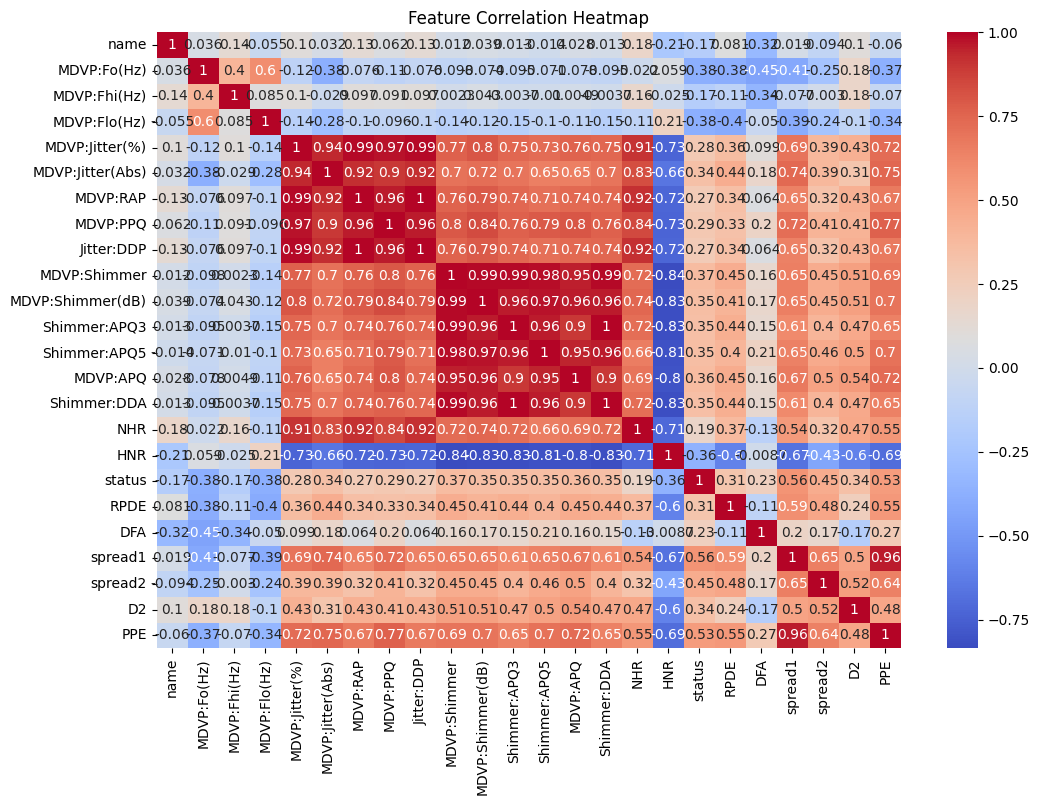

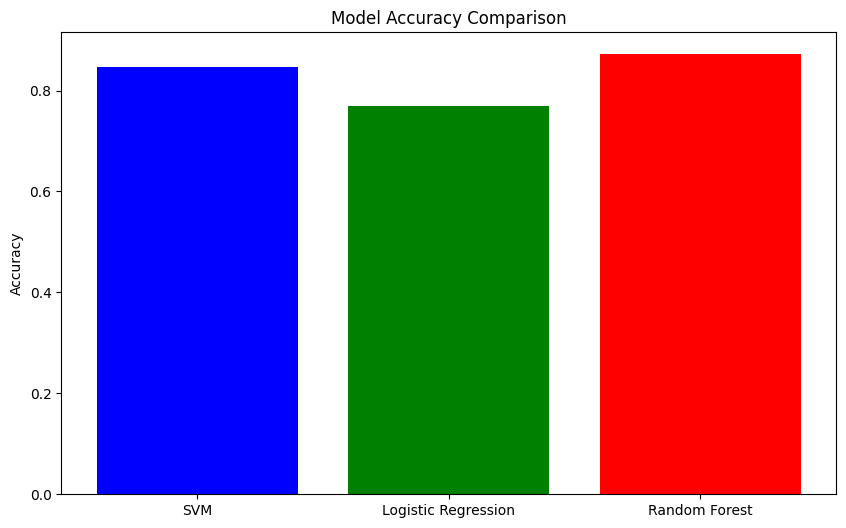

In [159]:
plt.figure(figsize=(12, 8))
sns.heatmap(parkinsons_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Compare results in a bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


In [160]:
# Input data to make predictions
input_data = (197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 0.00498, 
              0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 0.00339, 26.77500, 
              0.422229, 0.741367, -7.348300, 0.177551, 1.743867, 0.085569)

# Transform the input data
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
input_data_standardized = scaler.transform(input_data_as_numpy_array)
input_data_poly = poly.transform(input_data_standardized)
input_data_pca = pca.transform(input_data_poly)

# Make predictions for the input data using all models
for model_name, model in models.items():
    prediction = model.predict(input_data_pca)
    result = "has Parkinson's disease" if prediction[0] == 1 else "does not have Parkinson's disease"
    print(f"{model_name}: The person {result}.")


SVM: The person does not have Parkinson's disease.
Logistic Regression: The person does not have Parkinson's disease.
Random Forest: The person does not have Parkinson's disease.


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
